In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    return x * (1 - x)


In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.learning_rate = learning_rate
    
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return sigmoid(z)
    
    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            predictions = self.forward(X)
            
            error = y - predictions
            
            delta = error * sigmoid_derivative(predictions)
            weight_grad = np.dot(X.T, delta)
            bias_grad = np.sum(delta)
            
            self.weights += self.learning_rate * weight_grad
            self.bias += self.learning_rate * bias_grad

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [6]:
perceptron = Perceptron(input_size=2, learning_rate=0.1)
perceptron.train(X, y, epochs=1000)

In [7]:
predictions = perceptron.forward(X)
print("Predictions:", predictions.round(2))

Predictions: [0.52 0.5  0.5  0.49]


In [ ]:
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = perceptron.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap=plt.cm.RdYlBu, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('Perceptron Decision Boundary for XOR')
    plt.show()

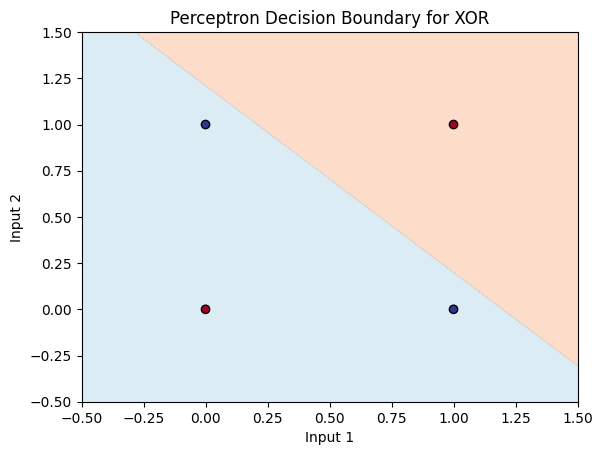

In [9]:
plot_decision_boundary(perceptron, X, y)